# Land´s End – Insight Analyst Case Study

## Feature description

As a Lead Marketing Analyst I want to get an understanding of how to use this data to build up a view of the Lands’ End customers’, the behaviours that they demonstrate, and how the business might be able to use this insight to inform and optimise our marketing endeavours.


In [1046]:
import pandas as pd
import os

In [1047]:
Customer = pd.read_excel(open('/Users/gonzalosaravia/Desktop/Lands End/Lands End Case Study - Lead Direct Marketing Analyst - Overview.docx-EmbeddedFile.xlsx', 'rb'), sheet_name='Customer')
Product = pd.read_excel(open('/Users/gonzalosaravia/Desktop/Lands End/Lands End Case Study - Lead Direct Marketing Analyst - Overview.docx-EmbeddedFile.xlsx', 'rb'), sheet_name='Product')
Channel = pd.read_excel(open('/Users/gonzalosaravia/Desktop/Lands End/Lands End Case Study - Lead Direct Marketing Analyst - Overview.docx-EmbeddedFile.xlsx', 'rb'), sheet_name='Channel')
Device = pd.read_excel(open('/Users/gonzalosaravia/Desktop/Lands End/Lands End Case Study - Lead Direct Marketing Analyst - Overview.docx-EmbeddedFile.xlsx', 'rb'), sheet_name='Device')
Order = pd.read_excel(open('/Users/gonzalosaravia/Desktop/Lands End/Lands End Case Study - Lead Direct Marketing Analyst - Overview.docx-EmbeddedFile.xlsx', 'rb'), sheet_name='Order')
OrderItem = pd.read_excel(open('/Users/gonzalosaravia/Desktop/Lands End/Lands End Case Study - Lead Direct Marketing Analyst - Overview.docx-EmbeddedFile.xlsx', 'rb'), sheet_name='OrderItem')

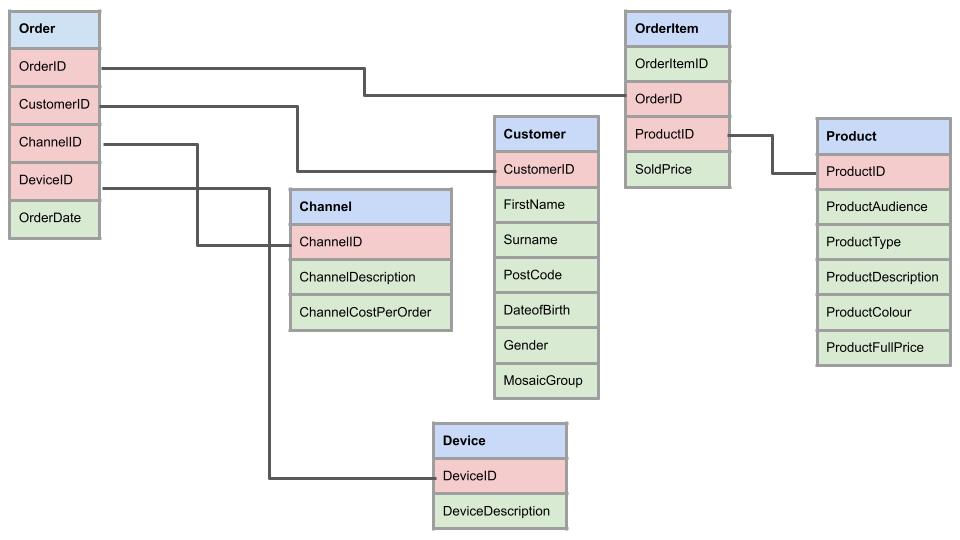

In [1048]:
from IPython.display import Image
Image(filename='/Users/gonzalosaravia/Desktop/Lands End/TablesJoin.png')

In [1049]:
Customer.head()

,CustomerID,FirstName,Surname,DateofBirth,PostcodeSubDistrict,Gender,MosaicGroup
0,1,Graham,Delacruz,1950-02-21,NN11,M,L
1,2,xyla,vaughn,1957-11-29,RG20,F,H
2,3,Kelsie,Sears,1971-03-31,TF6,F,D
3,4,Rina,Rollins,1971-01-31,NG34,F,E
4,5,Aileen__,Whitehead,1966-12-19,BH21,F,D


In [1050]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           1000 non-null   int64         
 1   FirstName            1000 non-null   object        
 2   Surname              1000 non-null   object        
 3   DateofBirth          1000 non-null   datetime64[ns]
 4   PostcodeSubDistrict  1000 non-null   object        
 5   Gender               1000 non-null   object        
 6   MosaicGroup          995 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 54.8+ KB


In [1051]:
Customer['MosaicGroup'].unique()

array(['L', 'H', 'D', 'E', 'F', 'K', 'O', 'N', 'A', 'M', 'G', 'B', 'C',
       'J', 'I', nan], dtype=object)

In [1052]:
Customer[Customer.isnull().any(axis=1)]

# https://www.experian.com/assets/marketing-services/product-sheets/mosaic-usa.pdf

,CustomerID,FirstName,Surname,DateofBirth,PostcodeSubDistrict,Gender,MosaicGroup
47,48,Nichole,Golden,2121-02-26,DL8,U,NaN
246,247,Scarlett,Schultz,2121-01-28,LE14,U,NaN
520,521,Mary,Boyer,2120-09-03,DN36,U,NaN
772,773,Kyra,Dillard,2120-06-26,L74,U,NaN
832,833,Martena,Dyer,2121-02-04,M34,U,NaN


In [1053]:
Customer['Gender'].unique()

array(['M', 'F', 'U'], dtype=object)

In [1054]:
gender = Customer.loc[:, 'Gender'] == 'U'
df_gender = Customer.loc[gender]
df_gender

,CustomerID,FirstName,Surname,DateofBirth,PostcodeSubDistrict,Gender,MosaicGroup
47,48,Nichole,Golden,2121-02-26,DL8,U,NaN
246,247,Scarlett,Schultz,2121-01-28,LE14,U,NaN
520,521,Mary,Boyer,2120-09-03,DN36,U,NaN
772,773,Kyra,Dillard,2120-06-26,L74,U,NaN
832,833,Martena,Dyer,2121-02-04,M34,U,NaN


In [1055]:
Customer['Gender'] = Customer['Gender'].replace({'U':'F'})

In [1056]:
Product.head()

,ProductID,ProductAudience,ProductType,ProductDescription,ProductColour,ProductFullPrice
0,1,F,Coat,Jacket,Black,85
1,2,F,Coat,Jacket,Navy,85
2,3,F,Coat,Jacket,White,85
3,4,F,Coat,Blazer,Black,65
4,5,F,Coat,Blazer,Navy,65


In [1057]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ProductID           50 non-null     int64 
 1   ProductAudience     50 non-null     object
 2   ProductType         50 non-null     object
 3   ProductDescription  50 non-null     object
 4   ProductColour       50 non-null     object
 5   ProductFullPrice    50 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [1058]:
Channel

,ChannelID,ChannelDescription,ChannelCostPerOrder
0,1,Direct to URL,0.0
1,2,Paid Search - Branded,0.5
2,3,Paid Search - Generic,3.0
3,4,SEO,0.0
4,5,Social Media,1.0
5,6,CallCentre,2.0


In [1059]:
Channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ChannelID            6 non-null      int64  
 1   ChannelDescription   6 non-null      object 
 2   ChannelCostPerOrder  6 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


In [1060]:
# Create ChannelID for the NaN's (I create this row so that I don't lose data while merging Tables)

Nan_Channel = {'ChannelID': 0, 'ChannelDescription': ' ', 'ChannelCostPerOrder': ' '}
#añadiendo la nueva fila al dataFrame
Channel = Channel.append(Nan_Channel, ignore_index= True)

In [1061]:
Channel.sort_values(by=['ChannelID'])

,ChannelID,ChannelDescription,ChannelCostPerOrder
6,0,,
0,1,Direct to URL,0
1,2,Paid Search - Branded,0.5
2,3,Paid Search - Generic,3
3,4,SEO,0
4,5,Social Media,1
5,6,CallCentre,2


In [1062]:
Device

,DeviceID,DeviceDescription
0,1,Desktop/Laptop
1,2,Tablet
2,3,Mobile


In [1063]:
# Create DeviceID for the NaN's (I create this row so that I don't lose data while merging Tables)

Nan_Device = {'DeviceID': 0, 'DeviceDescription': ' '}
#añadiendo la nueva fila al dataFrame
Device = Device.append(Nan_Device, ignore_index= True)

In [1064]:
Order.head()

,OrderID,CustomerID,ChannelID,DeviceID,OrderDate
0,1,914,6.0,NaN,2021-01-01
1,2,861,6.0,NaN,2021-01-01
2,3,140,6.0,NaN,2021-01-01
3,4,309,3.0,3.0,2021-01-01
4,5,484,3.0,2.0,2021-01-01


In [1065]:
Order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     10000 non-null  int64         
 1   CustomerID  10000 non-null  int64         
 2   ChannelID   9974 non-null   float64       
 3   DeviceID    7884 non-null   float64       
 4   OrderDate   10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 390.8 KB


In [1066]:
Order = Order.fillna(0)

In [1067]:
Order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     10000 non-null  int64         
 1   CustomerID  10000 non-null  int64         
 2   ChannelID   10000 non-null  float64       
 3   DeviceID    10000 non-null  float64       
 4   OrderDate   10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 390.8 KB


In [1068]:
OrderItem.head()

,OrderItemID,OrderID,ProductID,SoldPrice
0,1,1,10,30.0
1,2,2,7,75.0
2,3,2,46,40.0
3,4,3,47,50.0
4,5,4,49,40.5


In [1069]:
OrderItem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12616 entries, 0 to 12615
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderItemID  12616 non-null  int64  
 1   OrderID      12616 non-null  int64  
 2   ProductID    12616 non-null  int64  
 3   SoldPrice    12616 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 394.4 KB


In [1070]:
df = pd.merge(Customer, Order, on="CustomerID")

In [1071]:
df

,CustomerID,FirstName,Surname,DateofBirth,PostcodeSubDistrict,Gender,MosaicGroup,OrderID,ChannelID,DeviceID,OrderDate
0,1,Graham,Delacruz,1950-02-21,NN11,M,L,272,6.0,0.0,2021-01-14
1,1,Graham,Delacruz,1950-02-21,NN11,M,L,2713,6.0,0.0,2021-05-26
2,1,Graham,Delacruz,1950-02-21,NN11,M,L,3611,4.0,1.0,2021-07-02
3,1,Graham,Delacruz,1950-02-21,NN11,M,L,3722,6.0,0.0,2021-07-08
4,1,Graham,Delacruz,1950-02-21,NN11,M,L,3889,4.0,1.0,2021-07-19
...,...,...,...,...,...,...,...,...,...,...,...
9995,1000,Chantale,Workman,1967-04-23,BT2,F,J,7685,2.0,3.0,2021-11-24
9996,1000,Chantale,Workman,1967-04-23,BT2,F,J,7896,3.0,3.0,2021-11-28
9997,1000,Chantale,Workman,1967-04-23,BT2,F,J,8081,6.0,0.0,2021-12-01
9998,1000,Chantale,Workman,1967-04-23,BT2,F,J,8230,6.0,0.0,2021-12-03


In [1072]:
df = pd.merge(df, Channel, on = "ChannelID")

In [1073]:
df

,CustomerID,FirstName,Surname,DateofBirth,PostcodeSubDistrict,Gender,MosaicGroup,OrderID,ChannelID,DeviceID,OrderDate,ChannelDescription,ChannelCostPerOrder
0,1,Graham,Delacruz,1950-02-21,NN11,M,L,272,6.0,0.0,2021-01-14,CallCentre,2
1,1,Graham,Delacruz,1950-02-21,NN11,M,L,2713,6.0,0.0,2021-05-26,CallCentre,2
2,1,Graham,Delacruz,1950-02-21,NN11,M,L,3722,6.0,0.0,2021-07-08,CallCentre,2
3,1,Graham,Delacruz,1950-02-21,NN11,M,L,4173,6.0,0.0,2021-07-30,CallCentre,2
4,2,xyla,vaughn,1957-11-29,RG20,F,H,1270,6.0,0.0,2021-03-02,CallCentre,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,865,Elliott,Vang,1982-10-24,CT15,M,O,7197,0.0,0.0,2021-11-16,,
9996,880,Jessamine,Mendez,1962-05-22,CV35,F,N,7884,0.0,0.0,2021-11-28,,
9997,928,Alyssa,Livingston,1963-09-04,NR29,F,F,5061,0.0,0.0,2021-09-18,,
9998,940,Hiram,Wood,1958-12-26,AB39,M,M,6640,0.0,0.0,2021-11-04,,


In [1074]:
#Order[Order.isnull().any(axis=1)]

In [1075]:
df = pd.merge(df, OrderItem, on = "OrderID")

In [1076]:
df

,CustomerID,FirstName,Surname,DateofBirth,PostcodeSubDistrict,Gender,MosaicGroup,OrderID,ChannelID,DeviceID,OrderDate,ChannelDescription,ChannelCostPerOrder,OrderItemID,ProductID,SoldPrice
0,1,Graham,Delacruz,1950-02-21,NN11,M,L,272,6.0,0.0,2021-01-14,CallCentre,2,336,26,40.0
1,1,Graham,Delacruz,1950-02-21,NN11,M,L,2713,6.0,0.0,2021-05-26,CallCentre,2,3419,41,21.0
2,1,Graham,Delacruz,1950-02-21,NN11,M,L,3722,6.0,0.0,2021-07-08,CallCentre,2,4685,38,75.0
3,1,Graham,Delacruz,1950-02-21,NN11,M,L,3722,6.0,0.0,2021-07-08,CallCentre,2,4686,35,45.0
4,1,Graham,Delacruz,1950-02-21,NN11,M,L,4173,6.0,0.0,2021-07-30,CallCentre,2,5247,27,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,865,Elliott,Vang,1982-10-24,CT15,M,O,7197,0.0,0.0,2021-11-16,,,9074,47,50.0
12612,880,Jessamine,Mendez,1962-05-22,CV35,F,N,7884,0.0,0.0,2021-11-28,,,9940,4,39.0
12613,928,Alyssa,Livingston,1963-09-04,NR29,F,F,5061,0.0,0.0,2021-09-18,,,6388,10,27.0
12614,940,Hiram,Wood,1958-12-26,AB39,M,M,6640,0.0,0.0,2021-11-04,,,8357,24,36.0


In [1077]:
df = pd.merge(df, Product, on = "ProductID")

In [1078]:
df

,CustomerID,FirstName,Surname,DateofBirth,PostcodeSubDistrict,Gender,MosaicGroup,OrderID,ChannelID,DeviceID,...,ChannelDescription,ChannelCostPerOrder,OrderItemID,ProductID,SoldPrice,ProductAudience,ProductType,ProductDescription,ProductColour,ProductFullPrice
0,1,Graham,Delacruz,1950-02-21,NN11,M,L,272,6.0,0.0,...,CallCentre,2,336,26,40.0,F,Trousers,Jeans,White,40
1,6,Shelley,Armstrong,1944-11-02,CV35,F,E,3959,6.0,0.0,...,CallCentre,2,4967,26,36.0,F,Trousers,Jeans,White,40
2,9,Hilary,Stephenson,1953-07-22,WF9,F,O,1829,6.0,0.0,...,CallCentre,2,2294,26,32.0,F,Trousers,Jeans,White,40
3,12,Amery,Monroe,1965-02-09,ST20,M,L,2044,6.0,0.0,...,CallCentre,2,2572,26,40.0,F,Trousers,Jeans,White,40
4,18,Test,Test,1953-01-30,GL54,F,O,8887,6.0,0.0,...,CallCentre,2,11188,26,32.0,F,Trousers,Jeans,White,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,815,Rebekah,Solis,1960-05-09,BT66,F,K,4207,3.0,2.0,...,Paid Search - Generic,3,5291,46,50.0,K,Coat,Jacket,Black,50
12612,837,Lara,Fulton,1959-04-28,CH48,F,L,3162,3.0,1.0,...,Paid Search - Generic,3,3985,46,45.0,K,Coat,Jacket,Black,50
12613,955,Eleanor,Hooper,1982-12-30,BT2,F,N,6687,3.0,1.0,...,Paid Search - Generic,3,8418,46,50.0,K,Coat,Jacket,Black,50
12614,963,Bevis,Moore,1960-04-07,BD7,M,O,5644,3.0,1.0,...,Paid Search - Generic,3,7098,46,45.0,K,Coat,Jacket,Black,50


In [1079]:
df['DeviceID'].unique()

array([0., 1., 3., 2.])

In [1080]:
df = pd.merge(df, Device, on = "DeviceID")

In [1081]:
df

,CustomerID,FirstName,Surname,DateofBirth,PostcodeSubDistrict,Gender,MosaicGroup,OrderID,ChannelID,DeviceID,...,ChannelCostPerOrder,OrderItemID,ProductID,SoldPrice,ProductAudience,ProductType,ProductDescription,ProductColour,ProductFullPrice,DeviceDescription
0,1,Graham,Delacruz,1950-02-21,NN11,M,L,272,6.0,0.0,...,2,336,26,40.0,F,Trousers,Jeans,White,40,
1,6,Shelley,Armstrong,1944-11-02,CV35,F,E,3959,6.0,0.0,...,2,4967,26,36.0,F,Trousers,Jeans,White,40,
2,9,Hilary,Stephenson,1953-07-22,WF9,F,O,1829,6.0,0.0,...,2,2294,26,32.0,F,Trousers,Jeans,White,40,
3,12,Amery,Monroe,1965-02-09,ST20,M,L,2044,6.0,0.0,...,2,2572,26,40.0,F,Trousers,Jeans,White,40,
4,18,Test,Test,1953-01-30,GL54,F,O,8887,6.0,0.0,...,2,11188,26,32.0,F,Trousers,Jeans,White,40,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,570,Irma,Mcfarland,1961-02-04,NR29,F,D,8602,3.0,2.0,...,3,10841,46,30.0,K,Coat,Jacket,Black,50,Tablet
12612,571,Amethyst,Olson,1973-11-05,B40,F,D,7956,3.0,2.0,...,3,10025,46,35.0,K,Coat,Jacket,Black,50,Tablet
12613,602,Hayes,Walls,1954-10-07,WF9,M,L,6375,3.0,2.0,...,3,8026,46,30.0,K,Coat,Jacket,Black,50,Tablet
12614,659,Nicholas,Wilder,1977-08-09,S33,M,H,9617,3.0,2.0,...,3,12128,46,35.0,K,Coat,Jacket,Black,50,Tablet


In [1082]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12616 entries, 0 to 12615
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           12616 non-null  int64         
 1   FirstName            12616 non-null  object        
 2   Surname              12616 non-null  object        
 3   DateofBirth          12616 non-null  datetime64[ns]
 4   PostcodeSubDistrict  12616 non-null  object        
 5   Gender               12616 non-null  object        
 6   MosaicGroup          12558 non-null  object        
 7   OrderID              12616 non-null  int64         
 8   ChannelID            12616 non-null  float64       
 9   DeviceID             12616 non-null  float64       
 10  OrderDate            12616 non-null  datetime64[ns]
 11  ChannelDescription   12616 non-null  object        
 12  ChannelCostPerOrder  12616 non-null  object        
 13  OrderItemID          12616 non-

In [1083]:
# I choose to describe the channel as others and not as retail because it would be impossible for me to calculate the costs with the data provided.

df['ChannelDescription'] = df['ChannelDescription'].replace({' ':'Other Channel'})

In [1084]:
# Taking into account that the values that we don't know from which Channel came are just 32 and is not representative, we can suggest that the Cost Per Order would be 0, UNLESS THE FINAL TRANSACTION HAS A COST.

df['ChannelCostPerOrder'].value_counts()

0.0    4140
2.0    2562
1.0    2024
3.0    1952
0.5    1906
         32
Name: ChannelCostPerOrder, dtype: int64

In [1085]:
df['ChannelCostPerOrder'] = df['ChannelCostPerOrder'].replace({' ': 0})

In [1086]:
df['DeviceDescription'] = df['DeviceDescription'].replace({' ': 'Other devices'})

In [1087]:
# Quick view to see that we are not missing data

for col in df:
  print(df[col].unique())

[   1    6    9   12   18   39   41   50   54  128  141  157  164  189
  210  255  307  323  341  350  356  376  404  418  436  438  448  466
  487  493  510  542  587  595  621  665  695  719  731  761  795  806
  837  839  875  890  891  905  923  959  961  980   34  790   14   70
   80  104  108  111  148  149  152  163  167  187  222  233  244  277
  278  283  290  305  347  354  363  415  449  469  515  561  585  644
  688  713  737  799  824  848  885  939  972   17   20   26   85   89
  126  168  176  203  209  241  247  264  294  299  324  327  390  401
  406  413  440  452  492  503  539  554  579  583  617  625  631  681
  699  726  742  764  802  814  840  884  889  893  894  897  902  912
  915  926  931  969  975  997    8   32   94  117  147  190  243  258
  311  320  334  389  396  498  531  567  588  608  646  690  694  700
  701  733  736  743  747  751  833  864  876  895  906  920  927  947
  978  991   31   43   47  120  138  170  182  227  234  263  291  298
  331 

In [1088]:
df['MosaicGroup'].unique()

array(['L', 'E', 'O', 'I', 'M', 'F', 'D', 'K', 'J', 'B', 'A', 'H', 'N',
       'G', 'C', nan], dtype=object)

In [1089]:
# Create new columns

In [1090]:
# Age Column

from datetime import datetime, date 

df['DateofBirth'] = pd.to_datetime(df['DateofBirth'], errors='coerce')

df['DateofBirth'].dt.year

0        1950
1        1944
2        1953
3        1965
4        1953
         ... 
12611    1961
12612    1973
12613    1954
12614    1977
12615    1960
Name: DateofBirth, Length: 12616, dtype: int64

In [1091]:
today = pd.Timestamp('now')

In [1092]:
df['Age'] = (today - df['DateofBirth']).astype('<m8[Y]')

In [1093]:
df['Age'] = today.year - df['DateofBirth'].dt.year - ((today.month) < (df['DateofBirth'].dt.month))

In [1094]:
a = df.loc[:, 'Age'] == -99
df_a = df.loc[a]
df_a

,CustomerID,FirstName,Surname,DateofBirth,PostcodeSubDistrict,Gender,MosaicGroup,OrderID,ChannelID,DeviceID,...,OrderItemID,ProductID,SoldPrice,ProductAudience,ProductType,ProductDescription,ProductColour,ProductFullPrice,DeviceDescription,Age
124,247,Scarlett,Schultz,2121-01-28,LE14,F,NaN,9508,6.0,0.0,...,11992,38,45.0,M,Footwear,Boots,Red,75,Other devices,-99
208,833,Martena,Dyer,2121-02-04,M34,F,NaN,5497,6.0,0.0,...,6926,35,67.5,M,Footwear,Boots,Black,75,Other devices,-99
357,833,Martena,Dyer,2121-02-04,M34,F,NaN,8756,6.0,0.0,...,11033,45,24.0,M,Trousers,Jeans,Navy,40,Other devices,-99
573,833,Martena,Dyer,2121-02-04,M34,F,NaN,9651,6.0,0.0,...,12173,29,21.0,F,Trousers,Chinos,Navy,35,Other devices,-99
744,48,Nichole,Golden,2121-02-26,DL8,F,NaN,7764,6.0,0.0,...,9788,32,42.0,M,Coat,Parka,Navy,60,Other devices,-99
784,773,Kyra,Dillard,2120-06-26,L74,F,NaN,785,6.0,0.0,...,977,32,48.0,M,Coat,Parka,Navy,60,Other devices,-99
891,48,Nichole,Golden,2121-02-26,DL8,F,NaN,9967,6.0,0.0,...,12573,48,30.0,K,Coat,Jacket,White,50,Other devices,-99
1063,48,Nichole,Golden,2121-02-26,DL8,F,NaN,9967,6.0,0.0,...,12572,40,21.0,M,Footwear,Slippers,Navy,30,Other devices,-99
1257,773,Kyra,Dillard,2120-06-26,L74,F,NaN,785,6.0,0.0,...,978,9,75.0,F,Footwear,Boots,Red,75,Other devices,-99
1346,247,Scarlett,Schultz,2121-01-28,LE14,F,NaN,7964,6.0,0.0,...,10033,20,28.0,F,Shirt,Polo,Navy,35,Other devices,-99


In [1095]:
df['Age'] = df['Age'].replace([-99], 2)

Timestamp('2022-04-14 20:55:12.525852')

In [1096]:
df

,CustomerID,FirstName,Surname,DateofBirth,PostcodeSubDistrict,Gender,MosaicGroup,OrderID,ChannelID,DeviceID,...,OrderItemID,ProductID,SoldPrice,ProductAudience,ProductType,ProductDescription,ProductColour,ProductFullPrice,DeviceDescription,Age
0,1,Graham,Delacruz,1950-02-21,NN11,M,L,272,6.0,0.0,...,336,26,40.0,F,Trousers,Jeans,White,40,Other devices,72
1,6,Shelley,Armstrong,1944-11-02,CV35,F,E,3959,6.0,0.0,...,4967,26,36.0,F,Trousers,Jeans,White,40,Other devices,77
2,9,Hilary,Stephenson,1953-07-22,WF9,F,O,1829,6.0,0.0,...,2294,26,32.0,F,Trousers,Jeans,White,40,Other devices,68
3,12,Amery,Monroe,1965-02-09,ST20,M,L,2044,6.0,0.0,...,2572,26,40.0,F,Trousers,Jeans,White,40,Other devices,57
4,18,Test,Test,1953-01-30,GL54,F,O,8887,6.0,0.0,...,11188,26,32.0,F,Trousers,Jeans,White,40,Other devices,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,570,Irma,Mcfarland,1961-02-04,NR29,F,D,8602,3.0,2.0,...,10841,46,30.0,K,Coat,Jacket,Black,50,Tablet,61
12612,571,Amethyst,Olson,1973-11-05,B40,F,D,7956,3.0,2.0,...,10025,46,35.0,K,Coat,Jacket,Black,50,Tablet,48
12613,602,Hayes,Walls,1954-10-07,WF9,M,L,6375,3.0,2.0,...,8026,46,30.0,K,Coat,Jacket,Black,50,Tablet,67
12614,659,Nicholas,Wilder,1977-08-09,S33,M,H,9617,3.0,2.0,...,12128,46,35.0,K,Coat,Jacket,Black,50,Tablet,44


In [1097]:
# Create column for months

df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

df['Month_OrderDate'] = df['OrderDate'].dt.month

In [1098]:
# Create column for days of the week

df['Day_Orderdate'] = df['OrderDate'].dt.day_name()

In [1099]:
# Get info from the zipcode

import pgeocode

nom = pgeocode.Nominatim('gb')
Address = nom.query_postal_code(df['PostcodeSubDistrict'].values)
Address.head()

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,NN11,GB,"Lower Shuckburgh, Eydon, Norton, Everdon, Hell...",England,ENG,Warwickshire,11609021,NaN,NaN,52.2594,-1.179288,4.0
1,CV35,GB,"Loxley, Haseley, Ashorne, Charlecote, Norton L...",England,ENG,Warwickshire,11609021,NaN,NaN,52.1748,-1.597823,4.0
2,WF9,GB,"North Elmsall, Fitzwilliam, Hemsworth, Badswor...",England,ENG,West Yorkshire,2634219,NaN,NaN,53.6089,-1.313600,4.0
3,ST20,GB,"Gnosall, Marston, High Onn, Gnosall Heath, She...",England,ENG,Staffordshire,11609018,NaN,NaN,52.7856,-2.284554,4.0
4,GL54,GB,"Andoversford, Turkdean, Wyck Rissington, Littl...",England,ENG,Gloucestershire,11609035,NaN,NaN,51.8786,-1.860921,4.0


In [1100]:
# By sing this info we may say that some of this zipcodes are not from the UK or the zipcodes were note colected properly.

Address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12616 entries, 0 to 12615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   postal_code     12616 non-null  object 
 1   country_code    12600 non-null  object 
 2   place_name      12600 non-null  object 
 3   state_name      12600 non-null  object 
 4   state_code      12600 non-null  object 
 5   county_name     12600 non-null  object 
 6   county_code     11846 non-null  object 
 7   community_name  0 non-null      object 
 8   community_code  0 non-null      object 
 9   latitude        12600 non-null  float64
 10  longitude       12600 non-null  float64
 11  accuracy        12600 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.3+ MB


In [1101]:
# Most customers are from England, Scotland and Northern Irland

Address['state_code'].unique()

array(['ENG', 'SCT', 'NIR', nan], dtype=object)

In [1102]:
Address = Address.drop(columns=['postal_code', 'country_code', 'county_code', 'community_name', 'community_code', 'accuracy'])

Address.columns

Index(['place_name', 'state_name', 'state_code', 'county_name', 'latitude',
       'longitude'],
      dtype='object')

In [1103]:
df = pd.concat([df, Address], axis=1)

In [1104]:
df['Discount_GBP'] = df['ProductFullPrice'] - df['SoldPrice']
df['Discount_Percent'] =  df['Discount_GBP'] / df['ProductFullPrice']

In [1105]:
df.columns

Index(['CustomerID', 'FirstName', 'Surname', 'DateofBirth',
       'PostcodeSubDistrict', 'Gender', 'MosaicGroup', 'OrderID', 'ChannelID',
       'DeviceID', 'OrderDate', 'ChannelDescription', 'ChannelCostPerOrder',
       'OrderItemID', 'ProductID', 'SoldPrice', 'ProductAudience',
       'ProductType', 'ProductDescription', 'ProductColour',
       'ProductFullPrice', 'DeviceDescription', 'Age', 'Month_OrderDate',
       'Day_Orderdate', 'place_name', 'state_name', 'state_code',
       'county_name', 'latitude', 'longitude', 'Discount_GBP',
       'Discount_Percent'],
      dtype='object')

In [1106]:
df = df[['CustomerID', 'FirstName', 'Surname', 'DateofBirth', 'Age', 'Gender', 'MosaicGroup', 'PostcodeSubDistrict', 
         'place_name', 'state_name', 'state_code', 'county_name', 'latitude', 'longitude',
         'DeviceID', 'DeviceDescription', 'ChannelID', 'ChannelDescription', 'ChannelCostPerOrder',
         'OrderID','OrderDate', 'Month_OrderDate', 'Day_Orderdate', 'OrderItemID',
         'ProductID', 'SoldPrice', 'ProductAudience', 'ProductType','ProductDescription', 'ProductColour','ProductFullPrice',
         'Discount_GBP', 'Discount_Percent']]

In [1037]:

df2 = df.rename(columns={'DateofBirth':'Date_Of_Birth', 'PostcodeSubDistrict':'Customer_Zip_Code', 
             'place_name':'City', 'state_name':'Country', 'state_code':'Country_Code', 'county_name':'County_Name',
             'latitude':'Latitud', 'longitude':'Longitude',
             'DeviceID':'Device_ID', 'DeviceDescription':'Device_Description', 'ChannelID':'Channel_ID', 
             'ChannelDescription':'Channel_Description', 'ChannelCostPerOrder':'Channel_Cost_Per_Order',
             'OrderID':'Order_ID', 'OrderDate':'Order_Date', 'Month_OrderDate':'Month_Order_Date', 
             'Day_Order_date':'Day_Orderdate', 'OrderItemID':'Order_Item_ID',
             'ProductID':'Product_ID', 'SoldPrice':'Sold_Price', 'ProductAudience':'Product_Audience', 'ProductType':'Product_Type',
             'ProductDescription':'Product_Description', 'ProductColour':'Product_Colour','ProductFullPrice':'Product_Price'}, 
                inplace=True)

In [966]:
df2

,CustomerID,FirstName,Surname,DateofBirth,Age,Gender,MosaicGroup,PostcodeSubDistrict,place_name,state_name,...,OrderItemID,ProductID,SoldPrice,ProductAudience,ProductType,ProductDescription,ProductColour,ProductFullPrice,Discount_GBP,Discount_Percent
0,1,Graham,Delacruz,1950-02-21,72,M,L,NN11,"Lower Shuckburgh, Eydon, Norton, Everdon, Hell...",England,...,336,26,40.0,F,Trousers,Jeans,White,40,0.0,0.0
1,6,Shelley,Armstrong,1944-11-02,77,F,E,CV35,"Loxley, Haseley, Ashorne, Charlecote, Norton L...",England,...,4967,26,36.0,F,Trousers,Jeans,White,40,4.0,0.1
2,9,Hilary,Stephenson,1953-07-22,68,F,O,WF9,"North Elmsall, Fitzwilliam, Hemsworth, Badswor...",England,...,2294,26,32.0,F,Trousers,Jeans,White,40,8.0,0.2
3,12,Amery,Monroe,1965-02-09,57,M,L,ST20,"Gnosall, Marston, High Onn, Gnosall Heath, She...",England,...,2572,26,40.0,F,Trousers,Jeans,White,40,0.0,0.0
4,18,Test,Test,1953-01-30,69,F,O,GL54,"Andoversford, Turkdean, Wyck Rissington, Littl...",England,...,11188,26,32.0,F,Trousers,Jeans,White,40,8.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,570,Irma,Mcfarland,1961-02-04,61,F,D,NR29,"Runham, Winterton-on-Sea, Ormesby St Margaret,...",England,...,10841,46,30.0,K,Coat,Jacket,Black,50,20.0,0.4
12612,571,Amethyst,Olson,1973-11-05,48,F,D,B40,Birmingham,England,...,10025,46,35.0,K,Coat,Jacket,Black,50,15.0,0.3
12613,602,Hayes,Walls,1954-10-07,67,M,L,WF9,"North Elmsall, Fitzwilliam, Hemsworth, Badswor...",England,...,8026,46,30.0,K,Coat,Jacket,Black,50,20.0,0.4
12614,659,Nicholas,Wilder,1977-08-09,44,M,H,S33,Sheffield,England,...,12128,46,35.0,K,Coat,Jacket,Black,50,15.0,0.3


## View for Tableau

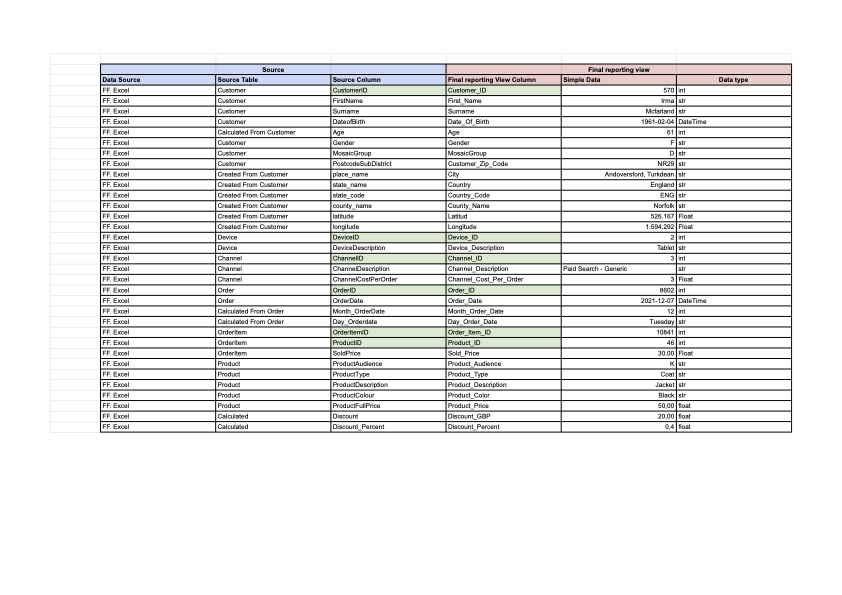

In [1107]:
Image(filename='/Users/gonzalosaravia/Desktop/Lands End/View .png')

In [1108]:
df.to_excel('/Users/gonzalosaravia/Desktop/Lands End/View.xlsx', sheet_name='Sheet1')

### Please find click at the link below to access customers dashboard.

In [ ]:
https://prod-uk-a.online.tableau.com/#/site/gonzalosaraviam/workbooks/140499?:origin=card_share_link

# 1) The Lands’ End Digital Customer

The Land's End UK Customers can be described as Female(56,23%) and Male(43,77%), primely age between 55 and 70 and secondly 35 to 40 and 50 to 55.
They are located in England, Scotland and North Ireland.  Most of the sales are concentrate in central England and surroundings, follow by places like Nappa, Flaby and east of England.
The Mosaic Group that stands out the most is "D" (Suburban Style: Comfortable lifestyle, Suburban living, Politically diverse, Family-centric activities, Parents,
Financial investments, Homeowner) been the ones that spend more in our products. Followed by "H"(Bourgeois Melting Pot: Sturdy blue-collar, Multi-cultural, Comfortable spending, Financially informed, Suburb living,
Married, Homeowners).
The Channels with which our customers use to purchase are Call-centre, direct URL, Paid Search Branded, Paid Search Generic, SEO and Social Media. At the same time, we can see that Mosaic Group "D" has on the top of channels social Media while Group "H" has a preference to purchase calling the call centre and by direct URL.
We can also highlight the behaviour by each device(Desktop/laptop: SEO, Mobile: Direct Url, Other devices: Call Centre, Tablet: Social Media) and conclude that there are still lots of customers choosing the call centre (assuming by phone).
A 43.20% of the purchase are made with discounts, and the month with more sales is December. During the year the purchase are made mostly at the begging of the month and after the 20th and the days of the weeks variates between month been Mondays and Fridays the top ones elected by them.
Land's End Customers product preference are boots, polos and slippers.



# 2) Quality of the Customer Information we hold, and any recommendations around this

The quality of the Customer information provided is mostly clean and can provide some insights of how the customers behave. Yet, I would suggest completing this data to be more accurate and provide better insights.
Adding to the order date, It would be interesting to have the time of purchase. This can be of great help by the time we create a campaign to reduce unnecessary costs.
The postcodes seem to be incomplete and would be very helpful to completed to get more accurate places to segment the campaigns.
Having the sizes of the product they purchase also can help by the time we create campaigns for each of the consumers in particular. 
Knowing when they used a discount code or coupon, or if there was a discount the day of the purchase, to understand if the discount strategies are working.

Other important information to have would be not just the ones on the customers, but also the ones that didn't purchase. This can help the marketing team to generate remarketing campaigns on the people that interacted with the call to actions campaigns, with the website and social media. There are always plenty of opportunities to get new customers by understanding where they left the purchase, for example.
Keywords, to improve the SEO, social media and Search campaigns.
CRT, CPC, etc.
The platform from which the campaign was created or sent.
The Email for Email marketing campaings.



# 3)&4) The different behaviours that Lands’ End customers demonstrate. How the behaviours you have identified can be used to optimise Lands’ End Marketing approach & strategy

As mentioned before, we can see clearly that a good percentage of the purchases are made with discounts, and this can give us an idea of how the customers react to them. Also, to mention that the possibility of knowing how they get does discounts would be very helpful to understand which ones are the ones that really function.
Customers in almost all their segments buy though the call centre. Knowing this, the sales team behind the call centre can offer different incentives to the customers to purchase by other channels. Such us giving discounts just to be used at the website, gifts on the first purchase by buying through the website so that the ones that don't know how to use it try to learn and continue to by through the web  next time.
Most sales are made during the beginning and the end of the month on Mondays and Fridays. This can help to improve and focus campaigns on those days and retarget the ones that haven't finished the purchase and to get new sales.



# 5) Future ideas for further analysis/insight

For further ideas, I would suggest including the data mention in question number 1 to improve social media campaigns, SEM and SEO.
Create email marketing campaigns to retain customers and get new ones by using newsletter and incomplete purchases.
Get better on paid search campaigns by getting the correct keywords, the hours and days to create them. Since is one of the most expensive channels that the company is using.
Try A/B testing on the paid search campaigns to see which one can attract more. 
Using platforms like Hotjar to understand how easy is to navigate at the website for the customers that continue calling the call centre. So that all the future customers finds a friendly and very easy to use website.
Using A/B testing for the website since there is also more content related to women and that might show why female are buying more than male. The A/B testing can be sent by email to target different customers.




# Aditional analytics

### Customers

In [829]:
### Quantity of Customers

len(df['CustomerID'].unique())

1000

# Revenue

In [830]:
# Total revenue if the product had been sold at the normal price

fp = df['ProductFullPrice'].sum()
fp

626085

In [831]:
# Total revenue (We can assume that in some dates, some products had a discount or a promotion was applied)

sp = df['SoldPrice'].sum()
sp

530452.0

In [832]:
# Difference between Total Full Price and Sold Price

dif = sp - fp
dif

-95633.0

# Amount of orders

In [833]:
len(df['OrderID'].unique())

10000

## What was the best month for Sales? How much was earn that month?

In [838]:
Best_month = df.groupby('Month_OrderDate').sum()

In [839]:
Best_month = Best_month.drop(columns=['CustomerID', 'OrderID', 'ChannelID', 'DeviceID', 'ChannelCostPerOrder', 'OrderItemID', 'ProductID', 'Age', 'latitude', 'longitude'])

In [840]:
# The best month for Sales was December, and we can see that during each month discounts were made.

Best_month

,SoldPrice,ProductFullPrice
Month_OrderDate,,
1,41121.5,45725
2,27499.5,30640
3,30122.5,33980
4,34224.0,38055
5,23865.0,26760
6,43375.5,48620
7,32359.0,36225
8,33754.0,37910
9,36316.5,43670


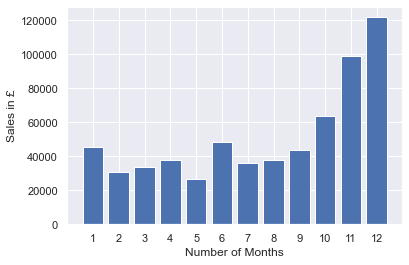

In [841]:
# Full price sales

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

months = range(1,13)

plt.bar(months, Best_month['ProductFullPrice'])
plt.xticks(months)
plt.ylabel('Sales in £')
plt.xlabel('Number of Months')
plt.show()

In [843]:
Days = df.groupby('Day_Orderdate').sum()
Days = Days.drop(columns=['CustomerID', 'OrderID', 'ChannelID', 'DeviceID', 'ChannelCostPerOrder', 'OrderItemID', 'ProductID', 'Age', 'Month_OrderDate', 'latitude', 'longitude'])
Days

,SoldPrice,ProductFullPrice
Day_Orderdate,,
Friday,90019.5,105835
Monday,85415.5,100540
Saturday,65870.5,78295
Sunday,67893.5,80400
Thursday,77319.0,90695
Tuesday,74098.5,87915
Wednesday,69835.5,82405


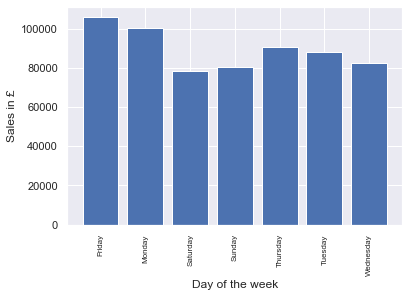

In [845]:
import matplotlib.pyplot as plt

D = [DAY for DAY, df in Days.groupby('Day_Orderdate')]

plt.bar(D, Days['ProductFullPrice'])
plt.xticks(D, rotation = 'vertical', size = 8)
plt.ylabel('Sales in £')
plt.xlabel('Day of the week')
plt.show()

In [1113]:
# Sales amount per product

df['ProductDescription'].value_counts()

Boots        2634
Polo         2030
Slippers     1799
Jeans        1525
Jacket       1419
Rugby Top    1071
Chinos        715
Parka         510
Gilet         468
Blazer        445
Name: ProductDescription, dtype: int64

In [1114]:
# Famale, Male and Kids 
df['ProductAudience'].value_counts()


F    7670
M    3746
K    1200
Name: ProductAudience, dtype: int64

In [1121]:
df['ProductAudience'].describe()

count     12616
unique        3
top           F
freq       7670
Name: ProductAudience, dtype: object